In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('/content/Breast Cancer data.csv')
target = df['diagnosis']
del df['id']
del df['diagnosis']
del df['Unnamed: 32']
df.head()
df.shape

(569, 30)

# **K-MEANS**

In [55]:
def kmeans(X, k, max_iters=100, tol=0.0001):

    # Randomize initial centroids
    randomized_indices = np.random.permutation(X.shape[0])[:k]
    centroids = X.iloc[randomized_indices].to_numpy()
    labels = np.zeros(X.shape[0], dtype=int)

    for _ in range(max_iters):
        # Assign each point to the closest centroid
        for i in range(len(X)):
          min_distance = float('inf')
          for j in range(k):
              distance = np.linalg.norm(X.iloc[i].to_numpy() - centroids[j])
              if distance < min_distance:
                  min_distance = distance
                  labels[i] = j

        # Update centroids
        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i]
            cluster_mean = cluster_points.mean(axis=0)
            new_centroids.append(cluster_mean)

        new_centroids = np.array(new_centroids)

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

In [56]:
def find_elbow_point(costs):
    # Calculate the first derivative of costs
    first_derivative = np.diff(costs)

    # Find the index where the first derivative starts decreasing significantly
    threshold = 0.1  # Adjust this threshold based on your data and requirements
    elbow_index = np.argmax(first_derivative < -threshold) + 1

    return elbow_index

def elbow_method(X, max_clusters=10):
    costs = []
    for k in range(1, max_clusters + 1):
        centroids, labels = kmeans(X, k)
        cost = np.sum((X - centroids[labels]) ** 2)
        costs.append(cost)
    print(costs)

    plt.plot(range(1, max_clusters + 1), costs, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cost')
    plt.show()

    # Find the elbow point
    elbow_k = find_elbow_point(costs)
    return elbow_k


**Apply K-Means**

[radius_mean                7.053947e+03
texture_mean               1.050738e+04
perimeter_mean             3.353702e+05
area_mean                  7.034314e+07
smoothness_mean            1.123502e-01
compactness_mean           1.584258e+00
concavity_mean             3.609781e+00
concave points_mean        8.552153e-01
symmetry_mean              4.268763e-01
fractal_dimension_mean     2.831407e-02
radius_se                  4.368054e+01
texture_se                 1.728515e+02
perimeter_se               2.321925e+03
area_se                    1.175437e+06
smoothness_se              5.120585e-03
compactness_se             1.821592e-01
concavity_se               5.175606e-01
concave points_se          2.162513e-02
symmetry_se                3.881309e-02
fractal_dimension_se       3.976961e-03
radius_worst               1.326861e+04
texture_worst              2.145704e+04
perimeter_worst            6.413463e+05
area_worst                 1.841271e+08
smoothness_worst           2.961097e-01

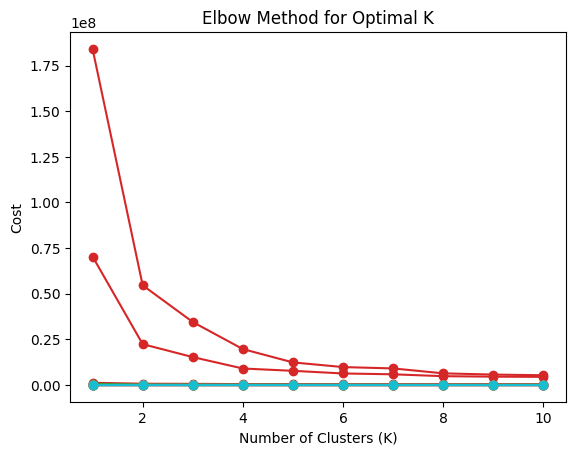

0.0


In [58]:
# Elbow is at 2
optimal_k = elbow_method(df,10)
centroids , labels = kmeans(df , optimal_k)
# Create a dictionary for label mapping
label_mapping = {i: str(i) for i in np.unique(labels)}

# Map labels to their corresponding values
mapped_labels = np.array([label_mapping[i] for i in labels])
accuracy = accuracy_score(target,mapped_labels)
# if labels are flipped
if accuracy<0.5:
  accuarcy = 1-accuracy
print(accuracy)

# PCA

PCA With Best K-Means

In [59]:
def bestPca(df):

  # Calculate means of every Dimesion
  means = df.mean()
  # Iterate through every Dimension and shift it towards origin
  for dimension in df.columns:
      df[dimension] = df[dimension] - means[dimension]

  # Calculate the covariance matrix
  cov_matrix = df.cov()
  # Get eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
  # Select K Based on the previous expirement elbow method
  optimal_k = elbow_method(df,10)
  selected_eigenvectors = eigenvectors[:, :k]

  # Project the original data onto the new subspace formed by the selected principal components
  transformed_data = np.dot(df.values, selected_eigenvectors)

  # Reconstruct the data from the reduced-dimensional space
  reconstructed_data = np.dot(transformed_data, selected_eigenvectors.T)
  return reconstructed_data


[radius_mean                7.053947e+03
texture_mean               1.050738e+04
perimeter_mean             3.353702e+05
area_mean                  7.034314e+07
smoothness_mean            1.123502e-01
compactness_mean           1.584258e+00
concavity_mean             3.609781e+00
concave points_mean        8.552153e-01
symmetry_mean              4.268763e-01
fractal_dimension_mean     2.831407e-02
radius_se                  4.368054e+01
texture_se                 1.728515e+02
perimeter_se               2.321925e+03
area_se                    1.175437e+06
smoothness_se              5.120585e-03
compactness_se             1.821592e-01
concavity_se               5.175606e-01
concave points_se          2.162513e-02
symmetry_se                3.881309e-02
fractal_dimension_se       3.976961e-03
radius_worst               1.326861e+04
texture_worst              2.145704e+04
perimeter_worst            6.413463e+05
area_worst                 1.841271e+08
smoothness_worst           2.961097e-01

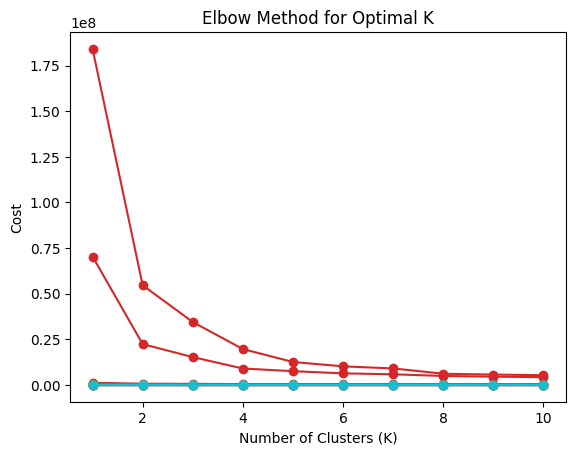

456587.3959166941


In [60]:
reconstructed_data=bestPca(df)
error = np.sum((df.values - reconstructed_data) ** 2)
print(error)

**PCA With Different K-Means**

In [61]:
def kPca(df, k_values):
    # Calculate means of every Dimension
    means = df.mean()
    # Iterate through every Dimension and shift it towards origin
    for dimension in df.columns:
        df[dimension] = df[dimension] - means[dimension]
    # Calculate the covariance matrix
    cov_matrix = df.cov()
    # Get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    squrared_error = []
    # Iterate over different values of k
    for k in k_values:
        # Select the first k eigenvectors
        selected_eigenvectors = eigenvectors[:, :k]
        # Project the original data onto the new subspace formed by the selected principal components
        transformed_data = np.dot(df.values, selected_eigenvectors)
        # Reconstruct the data from the reduced-dimensional space
        reconstructed_data = np.dot(transformed_data, selected_eigenvectors.T)
        # Calculate the sum of squared errors
        error = np.sum((df.values - reconstructed_data) ** 2)

        squrared_error.append(error)
    return squrared_error

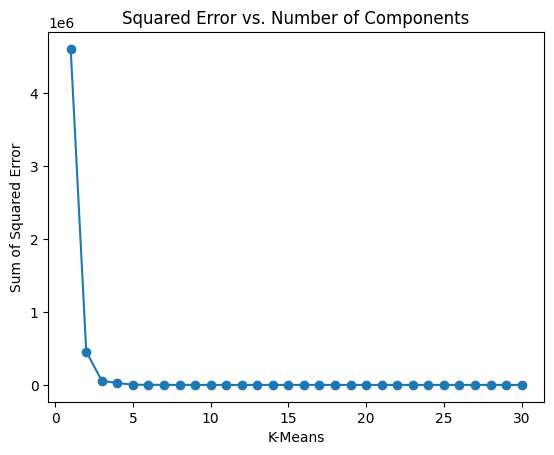

In [62]:
# Set the range of k values to iterate over in the pca and get the squared error
k_values = range(1, df.shape[1] + 1)
error_list = kPca(df, k_values)
# Plot Squrer Error against the k
plt.plot(k_values, error_list, marker='o')
plt.xlabel('K-Means')
plt.ylabel('Sum of Squared Error')
plt.title('Squared Error vs. Number of Components')
plt.show()

# **OBSERVATION:**

**As PCA-K Increases The Sum of Squared Error Decreases**